In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [72]:
data = pd.read_csv('/kaggle/input/simple-loan-classification-dataset/loan.csv')
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [73]:
data.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


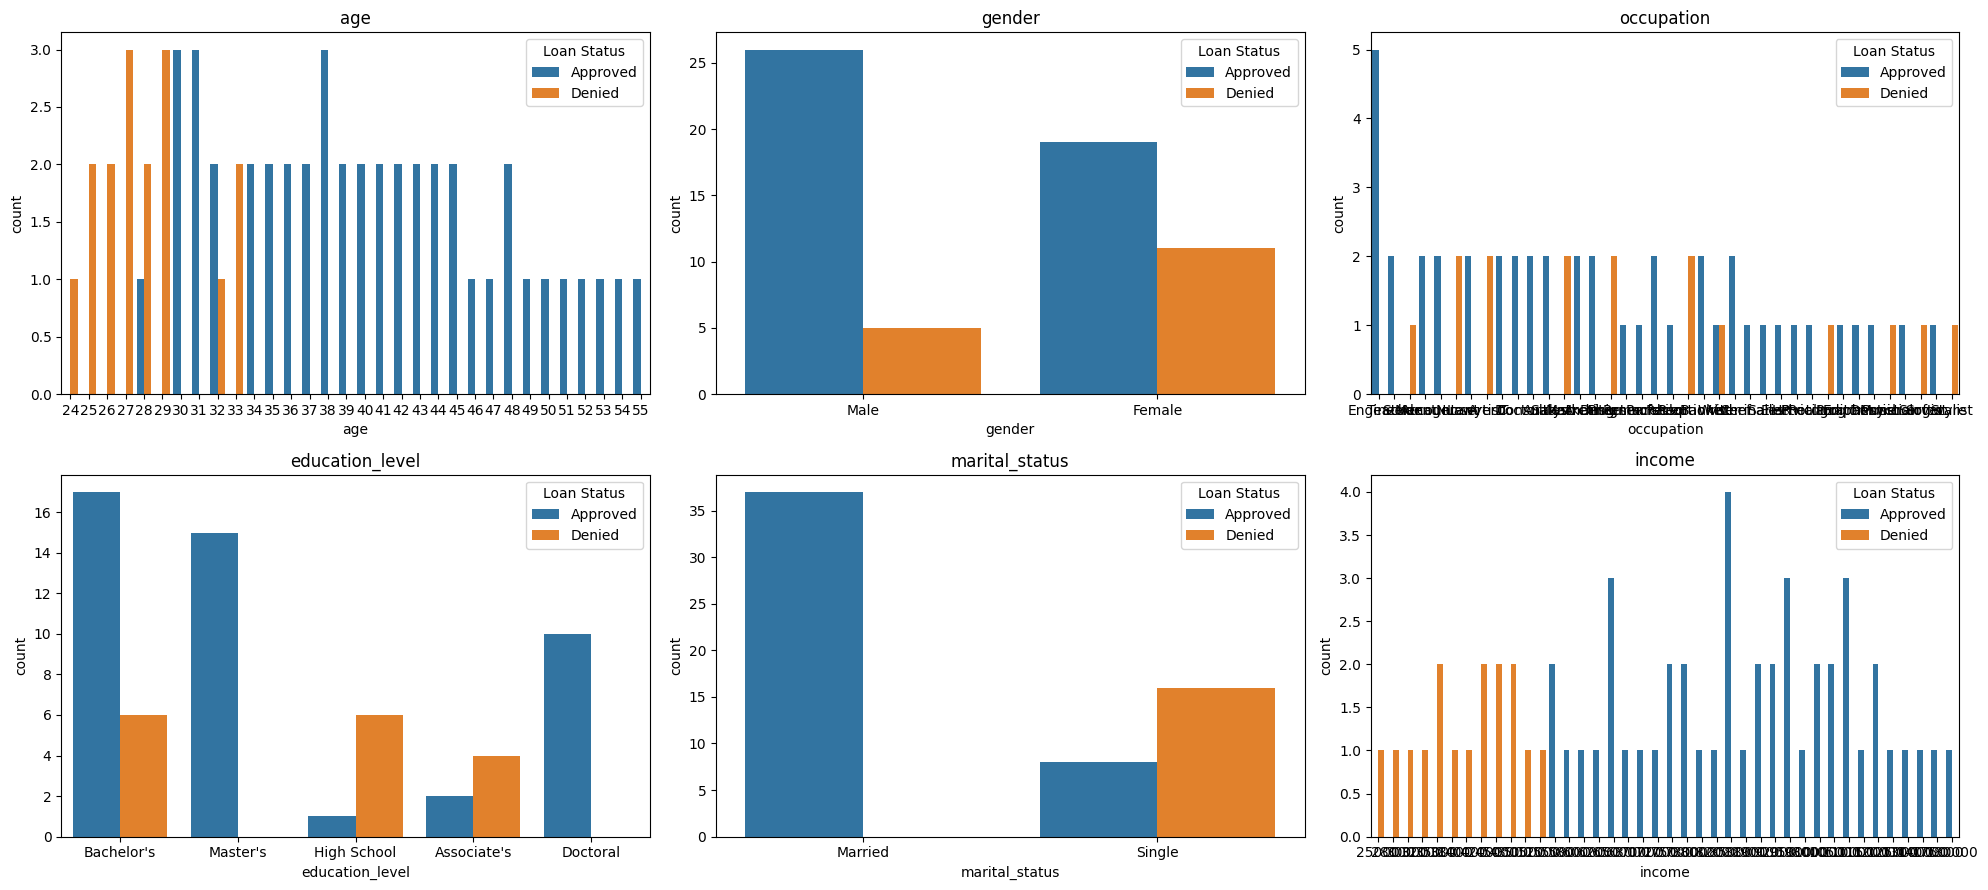

In [74]:
cols= data.columns
n_rows=2
n_cols=3
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_rows*10,n_cols*3))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        
        i=r*n_cols+c
        ax=axs[r][c]
        sns.countplot(x = data[cols[i]],hue=data['loan_status'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Loan Status',loc='upper right')
plt.tight_layout()

<Axes: xlabel='gender'>

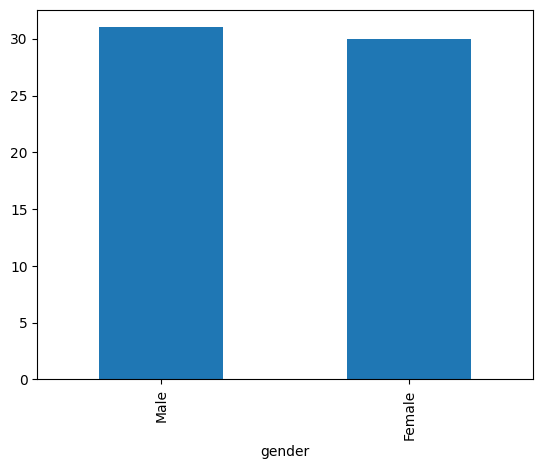

In [75]:
data['gender'].value_counts().plot(kind = 'bar')

<Axes: xlabel='education_level'>

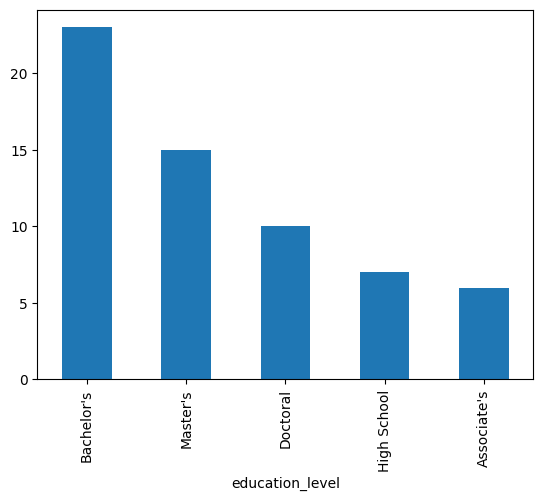

In [76]:
data['education_level'].value_counts().plot(kind = 'bar')

<Axes: xlabel='occupation'>

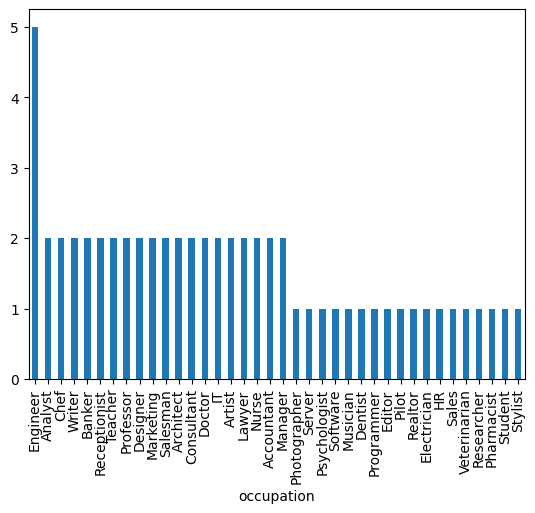

In [77]:
data['occupation'].value_counts().plot(kind = 'bar')

<Axes: xlabel='income'>

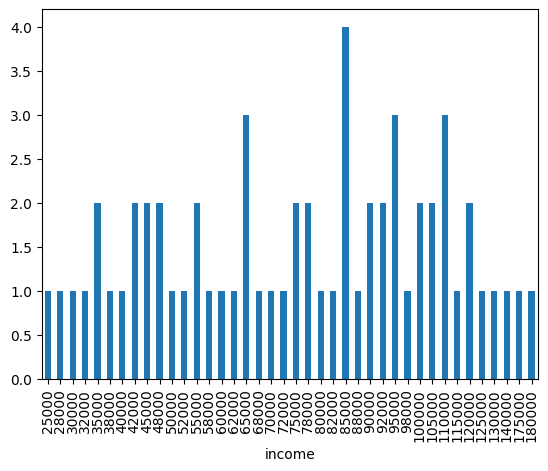

In [78]:
salary_counts = data['income'].value_counts().sort_index()
salary_counts.plot(kind = 'bar')

Rescaling

In [79]:
data.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

In [81]:
occu_names = data['occupation'].unique()
occu_names

array(['Engineer', 'Teacher', 'Student', 'Manager', 'Accountant', 'Nurse',
       'Lawyer', 'Artist', 'IT', 'Doctor', 'Consultant', 'Analyst',
       'Salesman', 'Marketing', 'Architect', 'Designer', 'Pharmacist',
       'Researcher', 'Professor', 'Pilot', 'Receptionist', 'Banker',
       'Writer', 'Chef', 'Veterinarian', 'Sales', 'HR', 'Electrician',
       'Realtor', 'Photographer', 'Editor', 'Programmer', 'Dentist',
       'Musician', 'Psychologist', 'Server', 'Software', 'Stylist'],
      dtype=object)

In [82]:
index = 0;

occupation_dict = {}

for occu in occu_names :
    occupation_dict[occu] = index;
    index+=1;
    
occupation_dict

{'Engineer': 0,
 'Teacher': 1,
 'Student': 2,
 'Manager': 3,
 'Accountant': 4,
 'Nurse': 5,
 'Lawyer': 6,
 'Artist': 7,
 'IT': 8,
 'Doctor': 9,
 'Consultant': 10,
 'Analyst': 11,
 'Salesman': 12,
 'Marketing': 13,
 'Architect': 14,
 'Designer': 15,
 'Pharmacist': 16,
 'Researcher': 17,
 'Professor': 18,
 'Pilot': 19,
 'Receptionist': 20,
 'Banker': 21,
 'Writer': 22,
 'Chef': 23,
 'Veterinarian': 24,
 'Sales': 25,
 'HR': 26,
 'Electrician': 27,
 'Realtor': 28,
 'Photographer': 29,
 'Editor': 30,
 'Programmer': 31,
 'Dentist': 32,
 'Musician': 33,
 'Psychologist': 34,
 'Server': 35,
 'Software': 36,
 'Stylist': 37}

In [83]:
# Gender Transformation 

data['gender'] = data['gender'].map({'Male' : 1 , 'Female' : 2})
data['education_level'] = data['education_level'].map({"Bachelor's" : 1 , "Master's" : 2 , "High School": 3 , "Associate's" : 4 , "Doctoral" : 5})
data['marital_status'] = data['marital_status'].map({"Married": 0 , "Single":1})
data['occupation'] = data['occupation'].map(occupation_dict)
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,0,1,0,85000,720,Approved
1,45,2,1,2,1,62000,680,Approved
2,28,1,2,3,1,25000,590,Denied
3,51,2,3,1,0,105000,780,Approved
4,36,1,4,1,0,75000,710,Approved


In [87]:
data['loan_status'] = data['loan_status'].map({'Approved':1 , 'Denied': 0})

In [88]:
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,0,1,0,85000,720,1
1,45,2,1,2,1,62000,680,1
2,28,1,2,3,1,25000,590,0
3,51,2,3,1,0,105000,780,1
4,36,1,4,1,0,75000,710,1


In [92]:
X = data.drop(columns = ['loan_status'])
y = data['loan_status'] 

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
print(f"Train shape : {X_train.shape} |  {y_train.shape}");
print(f"Train shape : {X_test.shape} |  {y_test.shape}");

Train shape : (42, 7) |  (42,)
Train shape : (19, 7) |  (19,)


In [97]:
# Normalize

from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

X_train_scaled = min_max.fit_transform(X_train)
X_test_scaled = min_max.fit_transform(X_test)

In [103]:
from sklearn.linear_model import LogisticRegression

Logi_model = LogisticRegression()

Logi_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [119]:
pred = Logi_model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [109]:
from sklearn.metrics import classification_report, accuracy_score
print("Logistic Regression:")
print(classification_report(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.79      1.00      0.88        15

    accuracy                           0.79        19
   macro avg       0.39      0.50      0.44        19
weighted avg       0.62      0.79      0.70        19

Accuracy: 0.7894736842105263


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
from sklearn.metrics import log_loss
y_pred_proba = Logi_model.predict_proba(X_test)[:, 1]
loss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {loss}')

Log Loss: 7.588137555603612


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[ 0  4]
 [ 0 15]]


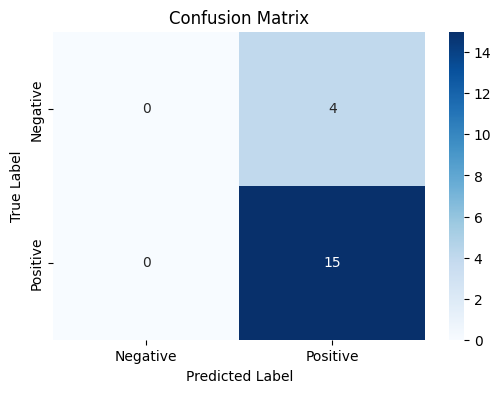

In [124]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.5


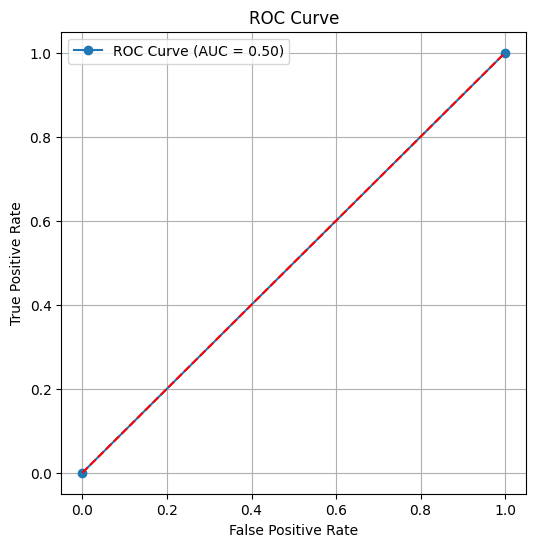

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

auc = roc_auc_score(y_test, y_pred_proba)

print(f'AUC: {auc}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, marker='o', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Applying Ridge

In [130]:
from sklearn.linear_model import RidgeClassifier

ridgemodel = RidgeClassifier(alpha = 0.1)

ridgemodel.fit(X_train_scaled,y_train)

ridge_y_pred = ridgemodel.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(


In [132]:
print("Ridge Regression:")
print(classification_report(y_test, ridge_y_pred))
print("Accuracy:", accuracy_score(y_test, ridge_y_pred))

Ridge Regression:
              precision    recall  f1-score   support

           0       0.21      1.00      0.35         4
           1       0.00      0.00      0.00        15

    accuracy                           0.21        19
   macro avg       0.11      0.50      0.17        19
weighted avg       0.04      0.21      0.07        19

Accuracy: 0.21052631578947367


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 4  0]
 [15  0]]


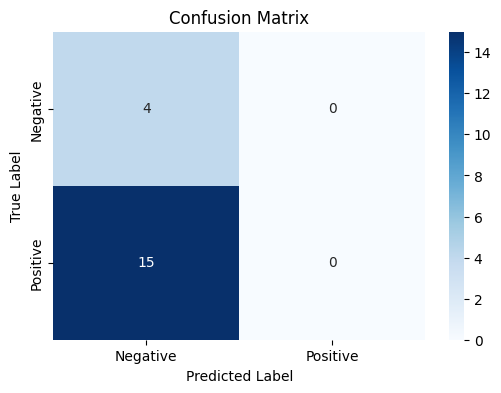

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ridge_y_pred)

print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [135]:
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=200)
lasso.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=200, penalty='l1', solver='saga')

In [136]:
y_pred_lasso = lasso.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [140]:
print("lasso Regression:")
print(classification_report(y_test, y_pred_lasso))
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))

lasso Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.79      1.00      0.88        15

    accuracy                           0.79        19
   macro avg       0.39      0.50      0.44        19
weighted avg       0.62      0.79      0.70        19

Accuracy: 0.7894736842105263


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0  4]
 [ 0 15]]


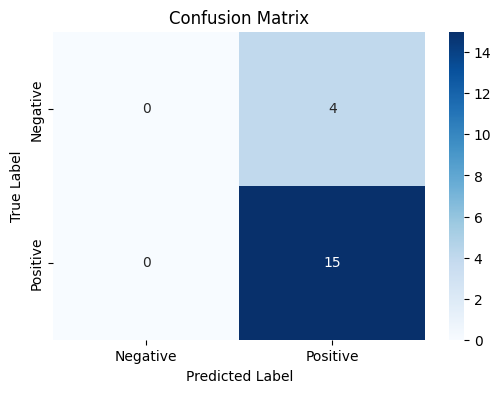

In [138]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lasso)

print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [139]:
elastic_net = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
elastic_net.fit(X_train_scaled,y_train)

y_pred_elastic_net = elastic_net.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [141]:
print("Elasticnet Regression:")
print(classification_report(y_test, y_pred_elastic_net))
print("Accuracy:", accuracy_score(y_test, y_pred_elastic_net))

Elasticnet Regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.79      1.00      0.88        15

    accuracy                           0.79        19
   macro avg       0.39      0.50      0.44        19
weighted avg       0.62      0.79      0.70        19

Accuracy: 0.7894736842105263


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[ 0  4]
 [ 0 15]]


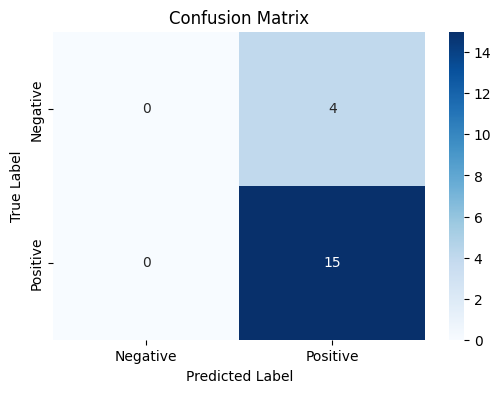

In [142]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_elastic_net)

print('Confusion Matrix:')
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()